# Working on data

### Loading required library to work upon data in Python

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Working with data
import pandas as pd

# Plotting library
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

#Sk-Learn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

### Importing data from the students of Math course & Portuguese course dataset

In [2]:
Math=pd.read_csv('Data/student-mat.csv', sep=';')
Port=pd.read_csv('Data/student-por.csv', sep=';')

### Review the dataset

In [3]:
Math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
Port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
Math.shape

(395, 33)

In [6]:
Port.shape

(649, 33)

In [7]:
Math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
Port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [9]:
Math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
Math.describe(include="object")

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [11]:
Port.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [12]:
Port.describe(include="object")

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


In [13]:
Math.isnull().sum(axis=0)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [14]:
Port.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

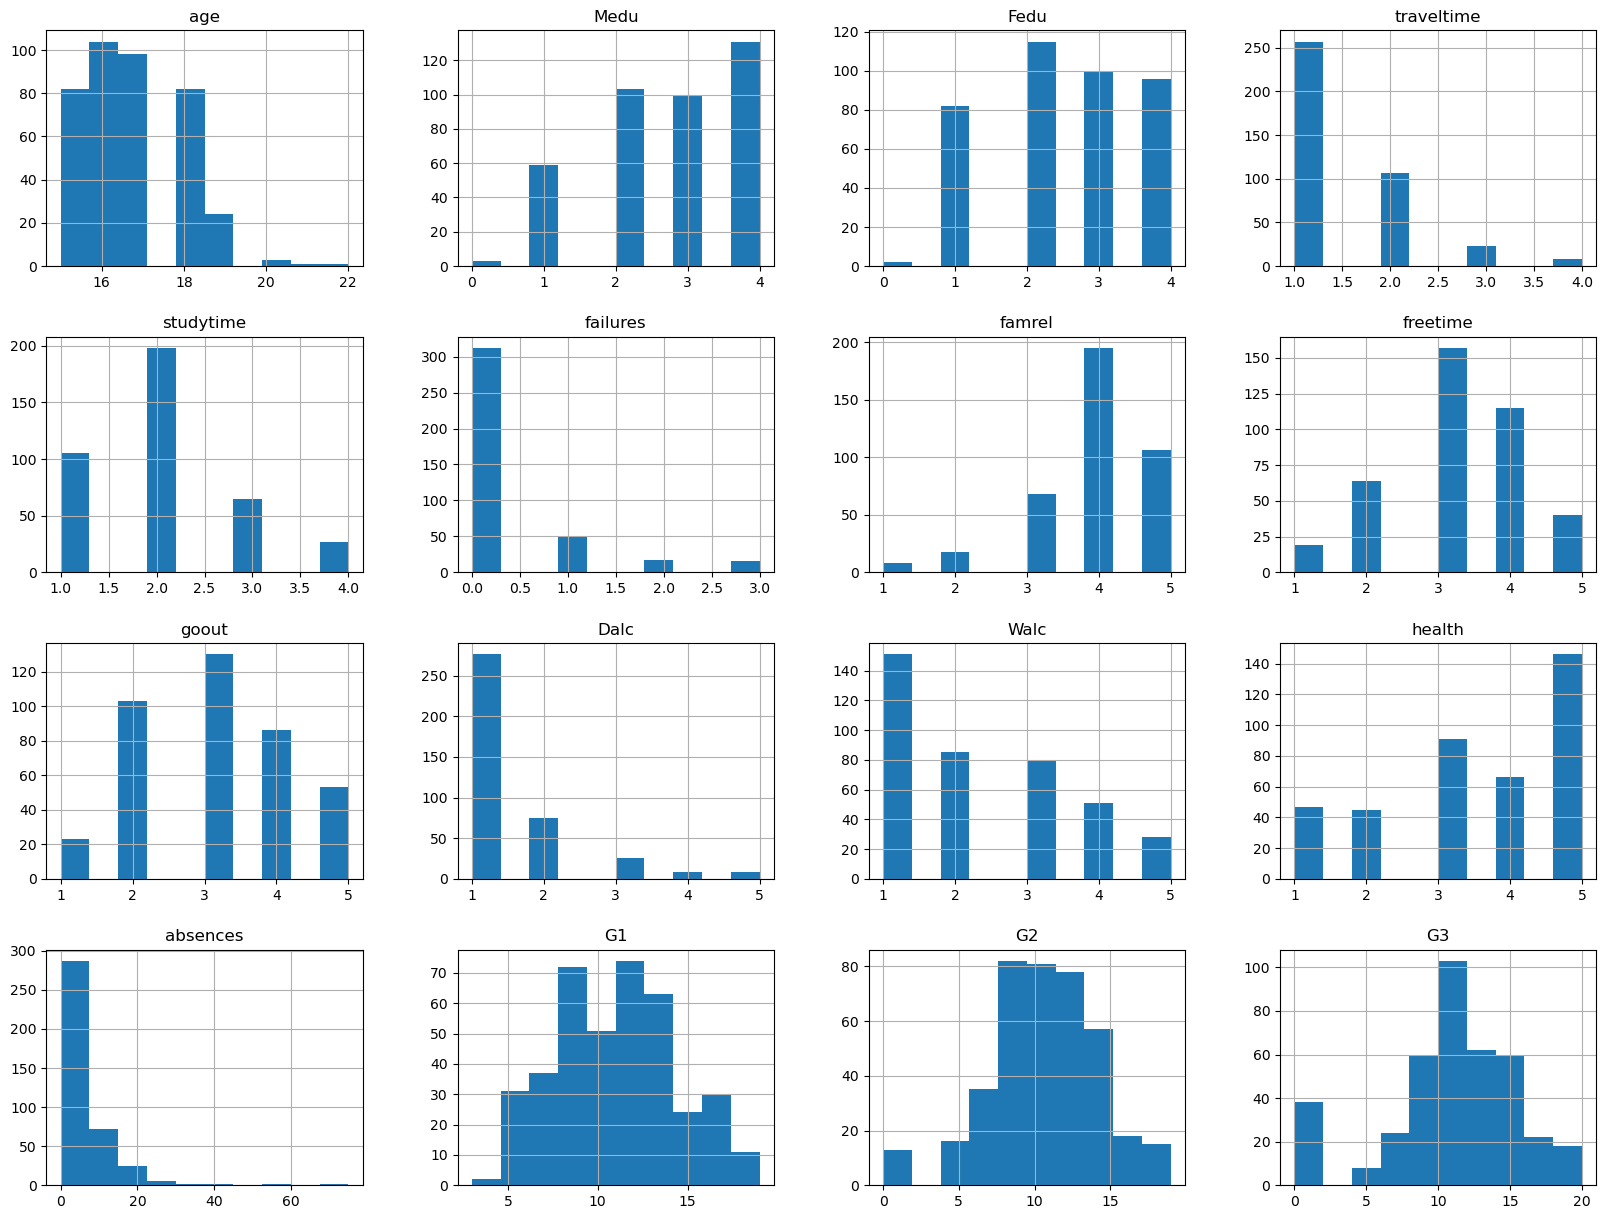

In [15]:
Math.hist(bins=10, figsize=(20, 15))
plt.show()

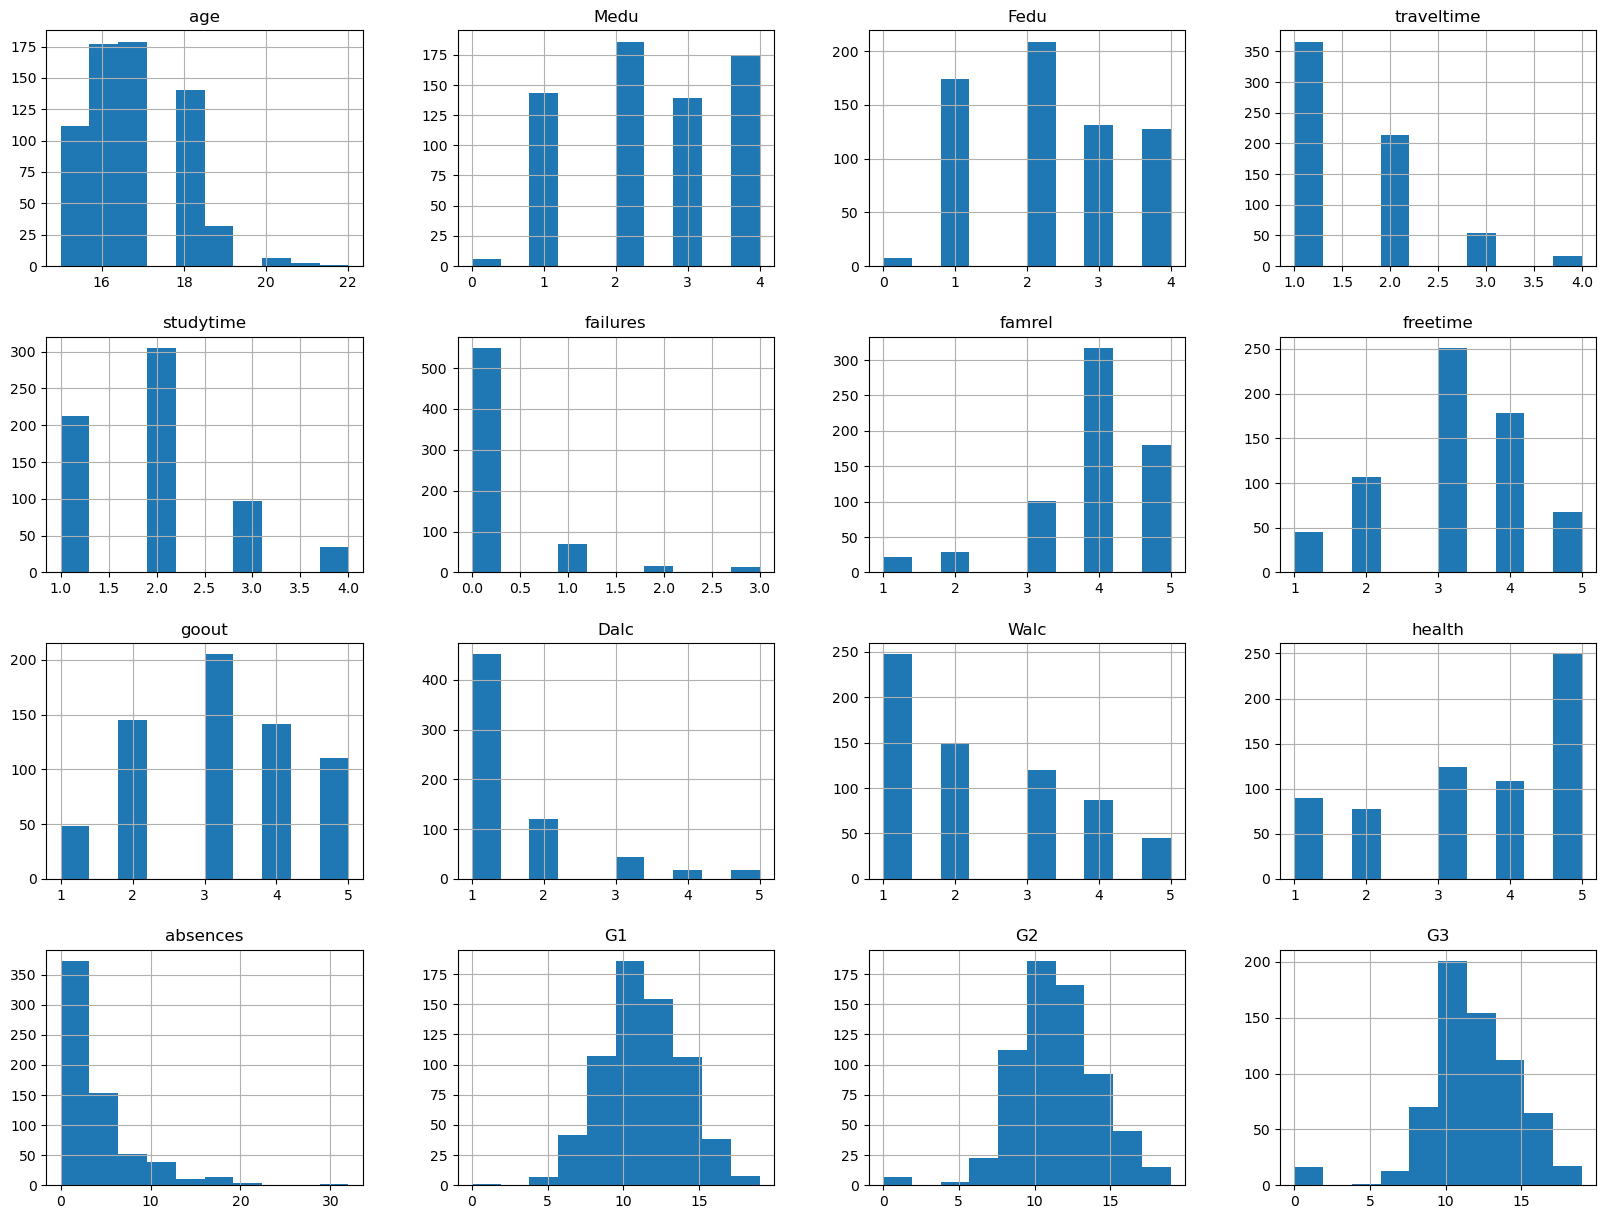

In [16]:
Port.hist(bins=10, figsize=(20, 15))
plt.show()

In [17]:
Math.duplicated().sum()

0

In [18]:
Port.duplicated().sum()

0

### Adding a feature "subject" to both datasets

In [19]:
Math["subject"]='M'
Port["subject"]='P'

In [20]:
temp1=Math.subject
Math.drop('subject', axis=1, inplace=True)
temp2=Port.subject
Port.drop('subject', axis=1, inplace=True)

In [21]:
Math=pd.concat([temp1, Math], axis=1)
Port=pd.concat([temp2, Port], axis=1)

In [22]:
# subject=pd.Series([], name='subject', dtype='object')
# Math=pd.concat([subject, Math], axis=1)
# Port=pd.concat([subject, Port], axis=1)
# Math=Math.fillna('M')
# Port=Port.fillna('P')

In [23]:
Math.head()

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,M,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,M,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,M,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,M,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,M,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [24]:
Port.head()

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,P,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,4,0,11,11
1,P,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,2,9,11,11
2,P,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,6,12,13,12
3,P,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,0,14,14,14
4,P,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,0,11,13,13


### Merging Both the datasets of Math and Portuguese Subject

In [25]:
df=pd.concat([Math, Port])

In [26]:
df.head()

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,M,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,M,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,M,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,M,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,M,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject     1044 non-null   object
 1   school      1044 non-null   object
 2   sex         1044 non-null   object
 3   age         1044 non-null   int64 
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        1044 non-null   int64 
 8   Fedu        1044 non-null   int64 
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  1044 non-null   int64 
 14  studytime   1044 non-null   int64 
 15  failures    1044 non-null   int64 
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery     10

In [28]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [29]:
df.subject.value_counts()

subject
P    649
M    395
Name: count, dtype: int64

### Declare feature vector and target variable

In [30]:
X=df.drop(['G3'], axis=1)
y=df['G3']

### Splitting data into Train and Test datasets

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=2022)

In [32]:
y_test.shape

(209,)

# Discover & Visualize the data to gain insights

### Create a copy of training dataset

In [33]:
data=X_train.copy()
data.head()

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
300,M,GP,F,18,U,LE3,A,4,4,health,...,yes,4,2,4,1,1,4,14,12,10
468,P,MS,M,15,U,GT3,T,2,2,health,...,no,4,3,3,1,2,4,1,13,12
42,P,GP,M,15,U,GT3,T,4,4,services,...,no,4,3,3,1,1,5,0,14,15
583,P,MS,F,18,R,GT3,T,2,2,other,...,yes,5,5,5,1,1,3,0,8,6
106,M,GP,F,15,U,GT3,T,2,2,other,...,no,5,1,2,1,1,3,8,7,8


### Looking for correlations

In [34]:
# data=data.drop(['subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], axis=1)
data=data.select_dtypes(exclude='object')
corr_matrix=data.corr()

In [35]:
corr_matrix['age'].sort_values(ascending=False)

age           1.000000
failures      0.298773
absences      0.158539
Dalc          0.123741
goout         0.106007
Walc          0.090718
traveltime    0.038912
freetime      0.012065
studytime    -0.007511
famrel       -0.017124
health       -0.020948
Medu         -0.135294
G1           -0.136387
Fedu         -0.137017
G2           -0.148746
Name: age, dtype: float64

We observe that famrel(quality of family relationships), health, absences and age are not much correlated with other features

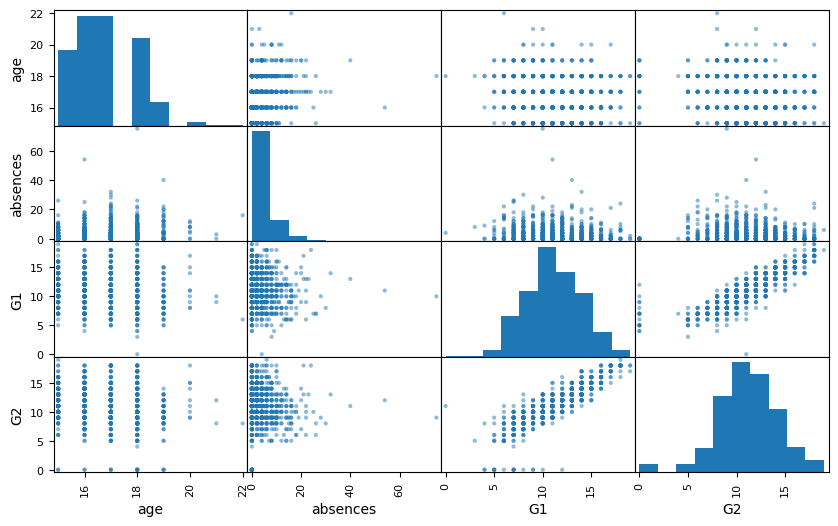

In [36]:
attributes=['age', 'absences', 'G1', 'G2']
scatter_matrix(data[attributes], figsize=(10, 6))
plt.show()

G1, G2 are positively correlated

# Prepare Data for Machine Learning Algorithm

### Data Cleaning 
This part is majorly done in first section, as there are no NA values in the data, we can continue to next part.

### Handling text & Categorical Atrributes

In [37]:
df_train=X_train.copy()

In [38]:
df_train=df_train.select_dtypes(include='object')

In [39]:
df_train.describe()

,subject,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835
unique,2,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,P,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,517,619,488,610,597,742,328,475,338,580,738,515,650,418,668,761,665,540


As the number of unique values of all the features are less than 25, we can Label Encode(OrdinalEncoder) the features and as it is also less than 10, we can make it's sparse matrix(OneHotEncoder) too

In [40]:
ordinal_encoder = OrdinalEncoder()
ordinal_train = ordinal_encoder.fit_transform(df_train)
ordinal_train

array([[0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 0.]])

In [41]:
hot_encoder=OneHotEncoder()
hot_train = hot_encoder.fit_transform(df_train)
hot_train.toarray()

array([[1., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.]])

### Custom Transformers to apply Encoding efficiently

In [42]:
df_train=X_train.copy()

In [43]:
categorical_cols=df_train.select_dtypes(include='object').columns
categorical_cols

Index(['subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [44]:
column_transform_ordinal = make_column_transformer((OrdinalEncoder(), categorical_cols), remainder='passthrough')

In [45]:
column_transform_hot = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categorical_cols), remainder='passthrough')

### Feature Scaling

In [46]:
df_train=X_train.copy()

In [47]:
continuous_cols=df_train.select_dtypes(include='int').columns
continuous_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [48]:
df_train=df_train.select_dtypes(exclude='object')

In [49]:
stdScaler=StandardScaler()
std_scaler = stdScaler.fit_transform(df_train)
std_scaler

array([[ 1.01183965,  1.23597114,  1.48686246, ...,  1.60015641,
         0.26972747, -0.38252496],
       [-1.40212066, -0.54186848, -0.33356299, ..., -0.55542783,
         0.60388539,  0.22413856],
       [-1.40212066,  1.23597114,  1.48686246, ..., -0.721242  ,
         0.93804331,  1.13413384],
       ...,
       [ 0.20718621,  0.34705133, -0.33356299, ..., -0.38961366,
         0.93804331,  1.4374656 ],
       [-0.59746722, -1.43078829,  0.57664974, ..., -0.721242  ,
        -1.06690421, -1.29252025],
       [-0.59746722, -0.54186848, -1.24377571, ..., -0.721242  ,
         0.93804331,  0.52747032]])

In [50]:
column_transform_stdScaler = make_column_transformer((StandardScaler(), continuous_cols), remainder='passthrough')

### Transformation Pipelines

In [51]:
continuous_pipeline = make_pipeline(column_transform_stdScaler)
categorical_pipeline = make_pipeline(column_transform_hot)

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', continuous_pipeline, continuous_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

In [53]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_train_scaled

array([[ 1.01183965,  1.23597114,  1.48686246, ...,  1.        ,
         0.        ,  1.        ],
       [-1.40212066, -0.54186848, -0.33356299, ...,  0.        ,
         1.        ,  0.        ],
       [-1.40212066,  1.23597114,  1.48686246, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.20718621,  0.34705133, -0.33356299, ...,  1.        ,
         1.        ,  0.        ],
       [-0.59746722, -1.43078829,  0.57664974, ...,  1.        ,
         0.        ,  1.        ],
       [-0.59746722, -0.54186848, -1.24377571, ...,  1.        ,
         1.        ,  0.        ]])

<Axes: >

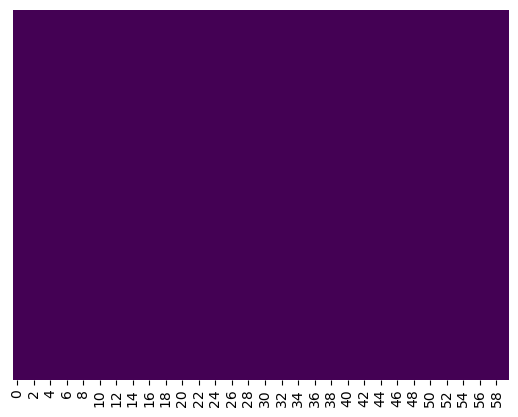

In [54]:
df=pd.DataFrame(X_train_scaled)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
X_test_scaled = preprocessor.transform(X_test)
X_test_scaled

array([[-1.40212066,  1.23597114,  1.48686246, ...,  1.        ,
         1.        ,  0.        ],
       [-1.40212066,  0.34705133,  1.48686246, ...,  1.        ,
         1.        ,  0.        ],
       [-0.59746722,  1.23597114,  1.48686246, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.59746722,  1.23597114,  0.57664974, ...,  1.        ,
         1.        ,  0.        ],
       [-1.40212066,  1.23597114,  0.57664974, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.20718621,  1.23597114,  1.48686246, ...,  1.        ,
         1.        ,  0.        ]])

# Select & Train a Model

In [56]:
# For Classification Models - Creating a Predefined function to assess the accuracy of a model. This will be the scoring function
# def score(model, title = "Default"):
#     model.fit(X_train, y_train)
#     preds = model.predict(X_test)
# #     print(confusion_matrix(y_test, preds))
#     accuracy = round(accuracy_score(y_test, preds), 5)
#     print('Accuracy for', title, ':', accuracy, '\n')

## Linear Models

#### Linear Regression using Normal Equation

In [57]:
lin_reg=LinearRegression()

In [58]:
lin_reg_model = make_pipeline(preprocessor, lin_reg)

In [59]:
lin_reg_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('standardscaler',
                                                                                                    StandardScaler(),
                                                                                                    Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='obj...
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))]))]),
                                                  Index(['subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [60]:
y_pred = lin_reg_model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.797708083413962

In [61]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

1.0458517120215312

In [62]:
lin_reg_model.score(X_train, y_train)

0.8585479423170217

In [63]:
lin_reg_model.score(X_test, y_test)

0.7824006666714424

#### Stochastic Gradient Descent

In [64]:
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.01, random_state=42)
sgd_reg_model = make_pipeline(preprocessor, sgd_reg)
sgd_reg_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('standardscaler',
                                                                                                    StandardScaler(),
                                                                                                    Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='obj...
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))]))]),
                                                  Index(['subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('sgdregressor',
                 SGDRegressor(max_iter=50, penalty=None, random_state=42))])

In [65]:
y_pred = sgd_reg_model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.7909765754079365

In [66]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

1.056174984980219

In [67]:
sgd_reg_model.score(X_train, y_train)

0.8572205833116717

In [68]:
sgd_reg_model.score(X_test, y_test)

0.7840272146668642

#### Regularized models

Ridge(l2) Penalty

In [69]:
# ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg = SGDRegressor(max_iter=50, penalty="l2", random_state=42)
# ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg_model = make_pipeline(preprocessor, ridge_reg)
ridge_reg_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('standardscaler',
                                                                                                    StandardScaler(),
                                                                                                    Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='obj...
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))]))]),
                                                  Index(['subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('sgdregressor', SGDRegressor(max_iter=50, random_state=42))])

In [70]:
y_pred = ridge_reg_model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.7909197883754457

In [71]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

1.05617649413204

In [72]:
ridge_reg_model.score(X_train, y_train)

0.8572159722224691

In [73]:
ridge_reg_model.score(X_test, y_test)

0.7840409102777504

Lasso(l1) Penalty

In [74]:
# lasso_reg = Lasso(alpha=0.01)
lasso_reg = SGDRegressor(max_iter=50, penalty="l1", random_state=42)
lasso_reg_model=make_pipeline(preprocessor, lasso_reg)
lasso_reg_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('standardscaler',
                                                                                                    StandardScaler(),
                                                                                                    Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='obj...
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))]))]),
                                                  Index(['subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('sgdregressor',
                 SGDRegressor(max_iter=50, penalty='l1', random_state=42))])

In [75]:
y_pred = lasso_reg_model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.7907727468257282

In [76]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

1.055798922849837

In [77]:
lasso_reg_model.score(X_train, y_train)

0.8572156427892397

In [78]:
lasso_reg_model.score(X_test, y_test)

0.7840763710011518

Elastic Net - Middle Ground between Ridge and Lasso

In [79]:
elsNet_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elsNet_reg_model = make_pipeline(preprocessor, elsNet_reg)
elsNet_reg_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('standardscaler',
                                                                                                    StandardScaler(),
                                                                                                    Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='obj...
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))]))]),
                                                  Index(['subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('elasticnet', ElasticNet(alpha=0.1, random_state=42))])

In [80]:
y_pred = elsNet_reg_model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.7359363189309205

In [81]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

0.9752692987430926

In [82]:
elsNet_reg_model.score(X_train, y_train)

0.8478039901190471

In [83]:
elsNet_reg_model.score(X_test, y_test)

0.797097780858564

#### Support Vector Machine

Linear SVM

In [84]:
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg_model = make_pipeline(preprocessor, svm_reg)
svm_reg_model.fit(X_train, y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('standardscaler',
                                                                                                    StandardScaler(),
                                                                                                    Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='obj...
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))]))]),
                                                  Index(['subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('linearsvr', LinearSVR(epsilon=1.5, random_state=42))])

In [85]:
y_pred = svm_reg_model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.838517109269535

In [86]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

1.0584600944185476

In [87]:
svm_reg_model.score(X_train, y_train)

0.8509182899243701

In [88]:
svm_reg_model.score(X_test, y_test)

0.7724092696333283

Non-Linear

In [89]:
svmPoly_reg = SVR(kernel="poly", degree=2, C=5, epsilon=0.1, gamma="auto")
svmPoly_reg_model = make_pipeline(preprocessor, svmPoly_reg)
svmPoly_reg_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('standardscaler',
                                                                                                    StandardScaler(),
                                                                                                    Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='obj...
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))]))]),
                                                  Index(['subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('svr', SVR(C=5, degree=2, gamma='auto', kernel='poly'))])

In [90]:
y_pred = svmPoly_reg_model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.824224826961343

In [91]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

1.0370035063327674

In [92]:
svmPoly_reg_model.score(X_train, y_train)

0.8740696346865071

In [93]:
svmPoly_reg_model.score(X_test, y_test)

0.7759340099402278

#### Decision Tree

In [94]:
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg_model=make_pipeline(preprocessor, tree_reg)
tree_reg_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('standardscaler',
                                                                                                    StandardScaler(),
                                                                                                    Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='obj...
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))]))]),
                                                  Index(['subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=4, random_state=42))])

In [95]:
y_pred = tree_reg_model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.007401867098989

In [96]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

1.0836771438442827

In [97]:
tree_reg_model.score(X_train, y_train)

0.8891931785205123

In [98]:
tree_reg_model.score(X_test, y_test)

0.7286762158790587

#### Ensemble Learning

Gradient Boosting

In [99]:
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=10, learning_rate=0.3, random_state=42)
gb_reg_model=make_pipeline(preprocessor, gb_reg)
gb_reg_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('standardscaler',
                                                                                                    StandardScaler(),
                                                                                                    Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='obj...
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))]))]),
                                                  Index(['subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.3, max_depth=2,
                                           n_estimators=10, random_state=42))])

In [100]:
y_pred = gb_reg_model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.7784663765721007

In [101]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

1.0205154337672657

In [102]:
gb_reg_model.score(X_train, y_train)

0.88537446153603

In [103]:
gb_reg_model.score(X_test, y_test)

0.7870338715917045

XG Boost

In [104]:
xg_reg = XGBRegressor(n_estimators=50, learning_rate=0.5, n_jobs=10)
xg_reg_model=make_pipeline(preprocessor, xg_reg)
xg_reg_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('standardscaler',
                                                                                                    StandardScaler(),
                                                                                                    Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='obj...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.5,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=50,
                              n_jobs=10, num_parallel_tree=None, predictor=None,
                              random_state=None, ...))])

In [105]:
y_pred = xg_reg_model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.788175676942271

In [106]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

1.0626353656418586

In [107]:
xg_reg_model.score(X_train, y_train)

0.999712761442747

In [108]:
xg_reg_model.score(X_test, y_test)

0.7847022037622131

Random Forest

In [109]:
rf_reg = RandomForestRegressor()
rf_reg_model=make_pipeline(preprocessor, rf_reg)
rf_reg_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('standardscaler',
                                                                                                    StandardScaler(),
                                                                                                    Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='obj...
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))]))]),
                                                  Index(['subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=136))])

In [110]:
y_pred = rf_reg_model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.8951523353368926

In [111]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

1.0410920349000843

In [112]:
rf_reg_model.score(X_train, y_train)

0.9818429771988674

In [113]:
rf_reg_model.score(X_test, y_test)

0.7581715078605764

# Fine Tuning a Model

Lets fix a model to fine tune the hyperparameters to increase the score to improve predictions of the model

In [114]:
scores = cross_val_score(rf_reg_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
display = np.sqrt(-scores)
display

array([1.46489011, 1.5663348 , 1.33446303, 1.12779815, 1.21887372])

### GridSearchCV

In [115]:
parameters = {
    'regressor__n_estimators': [130, 132, 134, 136, 138]
}
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
grid_search = GridSearchCV(pipeline, param_grid=parameters, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('columntransformer',
                                                                                          ColumnTransformer(remainder='passthrough',
                                                                                                            transformers=[('standardscaler',
                                                                                                                           StandardScaler(),
                                                                                                                           Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences...
                                                                         Index(['subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__n_estimators': [130, 132, 134, 136, 138]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [116]:
grid_search.best_params_

{'regressor__n_estimators': 136}

In [117]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.684260,0.118113,0.042359,0.011089,130,{'regressor__n_estimators': 130},-2.109805,-2.582797,-1.698590,-1.235064,...,-1.810469,0.485273,4,-0.263390,-0.252541,-0.265934,-0.290642,-0.308851,-0.276272,0.020513
1,1.695550,0.327770,0.043441,0.006838,132,{'regressor__n_estimators': 132},-2.109903,-2.576094,-1.699589,-1.231925,...,-1.807531,0.484801,2,-0.263830,-0.251089,-0.265524,-0.289052,-0.307275,-0.275354,0.020124
2,1.509862,0.249216,0.050979,0.027883,134,{'regressor__n_estimators': 134},-2.115375,-2.579713,-1.708642,-1.230792,...,-1.810565,0.486804,5,-0.263681,-0.249874,-0.266965,-0.289962,-0.307317,-0.275560,0.020448
3,1.678402,0.245976,0.043735,0.019420,136,{'regressor__n_estimators': 136},-2.111049,-2.568495,-1.706010,-1.228774,...,-1.807204,0.482769,1,-0.263938,-0.250173,-0.267600,-0.289828,-0.307553,-0.275818,0.020346
4,1.265868,0.511751,0.032008,0.014732,138,{'regressor__n_estimators': 138},-2.112832,-2.562072,-1.704429,-1.238041,...,-1.808943,0.477917,3,-0.265753,-0.248533,-0.266554,-0.290328,-0.307745,-0.275783,0.020792


### RandomizedSearchCV

In [118]:
parameters = {
        'regressor__n_estimators': randint(low=100, high=150)
    }
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
rnd_search = RandomizedSearchCV(pipeline, param_distributions=parameters,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('columntransformer',
                                                                                                ColumnTransformer(remainder='passthrough',
                                                                                                                  transformers=[('standardscaler',
                                                                                                                                 StandardScaler(),
                                                                                                                                 Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'ab...
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                                             ('regressor',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'regressor__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020EB458C550>},
                   random_state=42, scoring='neg_mean_squared_error')

In [119]:
rnd_search.best_params_

{'regressor__n_estimators': 138}

In [120]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.082002,0.196607,0.028923,5.803673e-03,138,{'regressor__n_estimators': 138},-2.112832,-2.562072,-1.704429,-1.238041,-1.427342,-1.808943,0.477917,1
1,0.771689,0.045572,0.024186,8.078986e-03,128,{'regressor__n_estimators': 128},-2.115333,-2.573305,-1.706493,-1.236485,-1.433369,-1.812997,0.481103,3
2,0.884100,0.124092,0.023341,6.628971e-03,114,{'regressor__n_estimators': 114},-2.111641,-2.567788,-1.719065,-1.266438,-1.445161,-1.822019,0.469328,8
3,0.852040,0.120216,0.021901,1.062842e-02,142,{'regressor__n_estimators': 142},-2.124063,-2.552098,-1.702845,-1.241198,-1.448573,-1.813755,0.472212,4
4,0.776966,0.153296,0.016969,2.343070e-03,107,{'regressor__n_estimators': 107},-2.121821,-2.584917,-1.728856,-1.261626,-1.449250,-1.829294,0.476090,10
5,1.275473,0.207809,0.040782,1.816098e-02,120,{'regressor__n_estimators': 120},-2.109543,-2.566740,-1.711636,-1.249426,-1.440101,-1.815489,0.473914,7
6,1.183550,0.391817,0.026867,1.232225e-02,138,{'regressor__n_estimators': 138},-2.112832,-2.562072,-1.704429,-1.238041,-1.427342,-1.808943,0.477917,1
7,0.634945,0.019094,0.015622,1.168008e-07,118,{'regressor__n_estimators': 118},-2.104812,-2.565144,-1.714956,-1.245484,-1.444438,-1.814967,0.472944,6
8,0.699252,0.029759,0.021632,8.043325e-03,122,{'regressor__n_estimators': 122},-2.116046,-2.564665,-1.706053,-1.246706,-1.436974,-1.814089,0.475469,5
9,0.840505,0.283893,0.026395,1.025372e-02,110,{'regressor__n_estimators': 110},-2.121630,-2.564752,-1.728479,-1.263881,-1.440481,-1.823845,0.470583,9


### Tune the final model with best parameters

In [137]:
final_reg = RandomForestRegressor(n_estimators=136)
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', final_reg)
])
final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('standardscaler',
                                                                                                    StandardScaler(),
                                                                                                    Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')...
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))]))]),
                                                  Index(['subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(n_estimators=136))])

In [138]:
final_model.score(X_train, y_train)

0.9824603096364444

In [139]:
final_model.score(X_test, y_test)

0.7583936205747709

The score of the final model for predicting the scores of the students are 0.9812 for training and 0.7567 for testing dataset.
The model looks little overfit as the score of training data is greater than testing data.

### Feature Importance

In [140]:
importances=final_model.named_steps['regressor'].feature_importances_

In [141]:
feat_importances = {}

for i,features in zip(importances,X_train.columns):
    print("{}: {}".format(features,i))
    feat_importances[features] = i

subject: 0.006703373756985263
school: 0.003363126557235323
sex: 0.0027488042785954836
age: 0.002217895364229067
address: 0.005179743459907925
famsize: 0.0019602793310465653
Pstatus: 0.004973629811834413
Medu: 0.004514142364897221
Fedu: 0.003611958479085599
Mjob: 0.0014170948821738878
Fjob: 0.0028229586500154273
reason: 0.004238165453621207
guardian: 0.06965633120624792
traveltime: 0.007626827607663942
studytime: 0.8281735648711653
failures: 0.0021401109452896775
schoolsup: 0.0014153956276361415
famsup: 0.0012500524614778282
paid: 0.0008117673703927097
activities: 0.0020604392945179134
nursery: 0.0012686709896634917
higher: 0.0005193619728327921
internet: 0.0006620486253052928
romantic: 0.0006187796087257311
famrel: 0.0010468450005842048
freetime: 0.00027630022110312983
goout: 0.0002574307295750299
Dalc: 0.0006204488517158041
Walc: 0.0006019405215793276
health: 0.0009270607356672453
absences: 0.0012598249133696795
G1: 0.0032882678424805485
G2: 0.00022809546153987234


In [142]:
feat_importances = dict(sorted(feat_importances.items(), key=lambda item: item[1]))


feat_importances

{'G2': 0.00022809546153987234,
 'goout': 0.0002574307295750299,
 'freetime': 0.00027630022110312983,
 'higher': 0.0005193619728327921,
 'Walc': 0.0006019405215793276,
 'romantic': 0.0006187796087257311,
 'Dalc': 0.0006204488517158041,
 'internet': 0.0006620486253052928,
 'paid': 0.0008117673703927097,
 'health': 0.0009270607356672453,
 'famrel': 0.0010468450005842048,
 'famsup': 0.0012500524614778282,
 'absences': 0.0012598249133696795,
 'nursery': 0.0012686709896634917,
 'schoolsup': 0.0014153956276361415,
 'Mjob': 0.0014170948821738878,
 'famsize': 0.0019602793310465653,
 'activities': 0.0020604392945179134,
 'failures': 0.0021401109452896775,
 'age': 0.002217895364229067,
 'sex': 0.0027488042785954836,
 'Fjob': 0.0028229586500154273,
 'G1': 0.0032882678424805485,
 'school': 0.003363126557235323,
 'Fedu': 0.003611958479085599,
 'reason': 0.004238165453621207,
 'Medu': 0.004514142364897221,
 'Pstatus': 0.004973629811834413,
 'address': 0.005179743459907925,
 'subject': 0.0067033737569

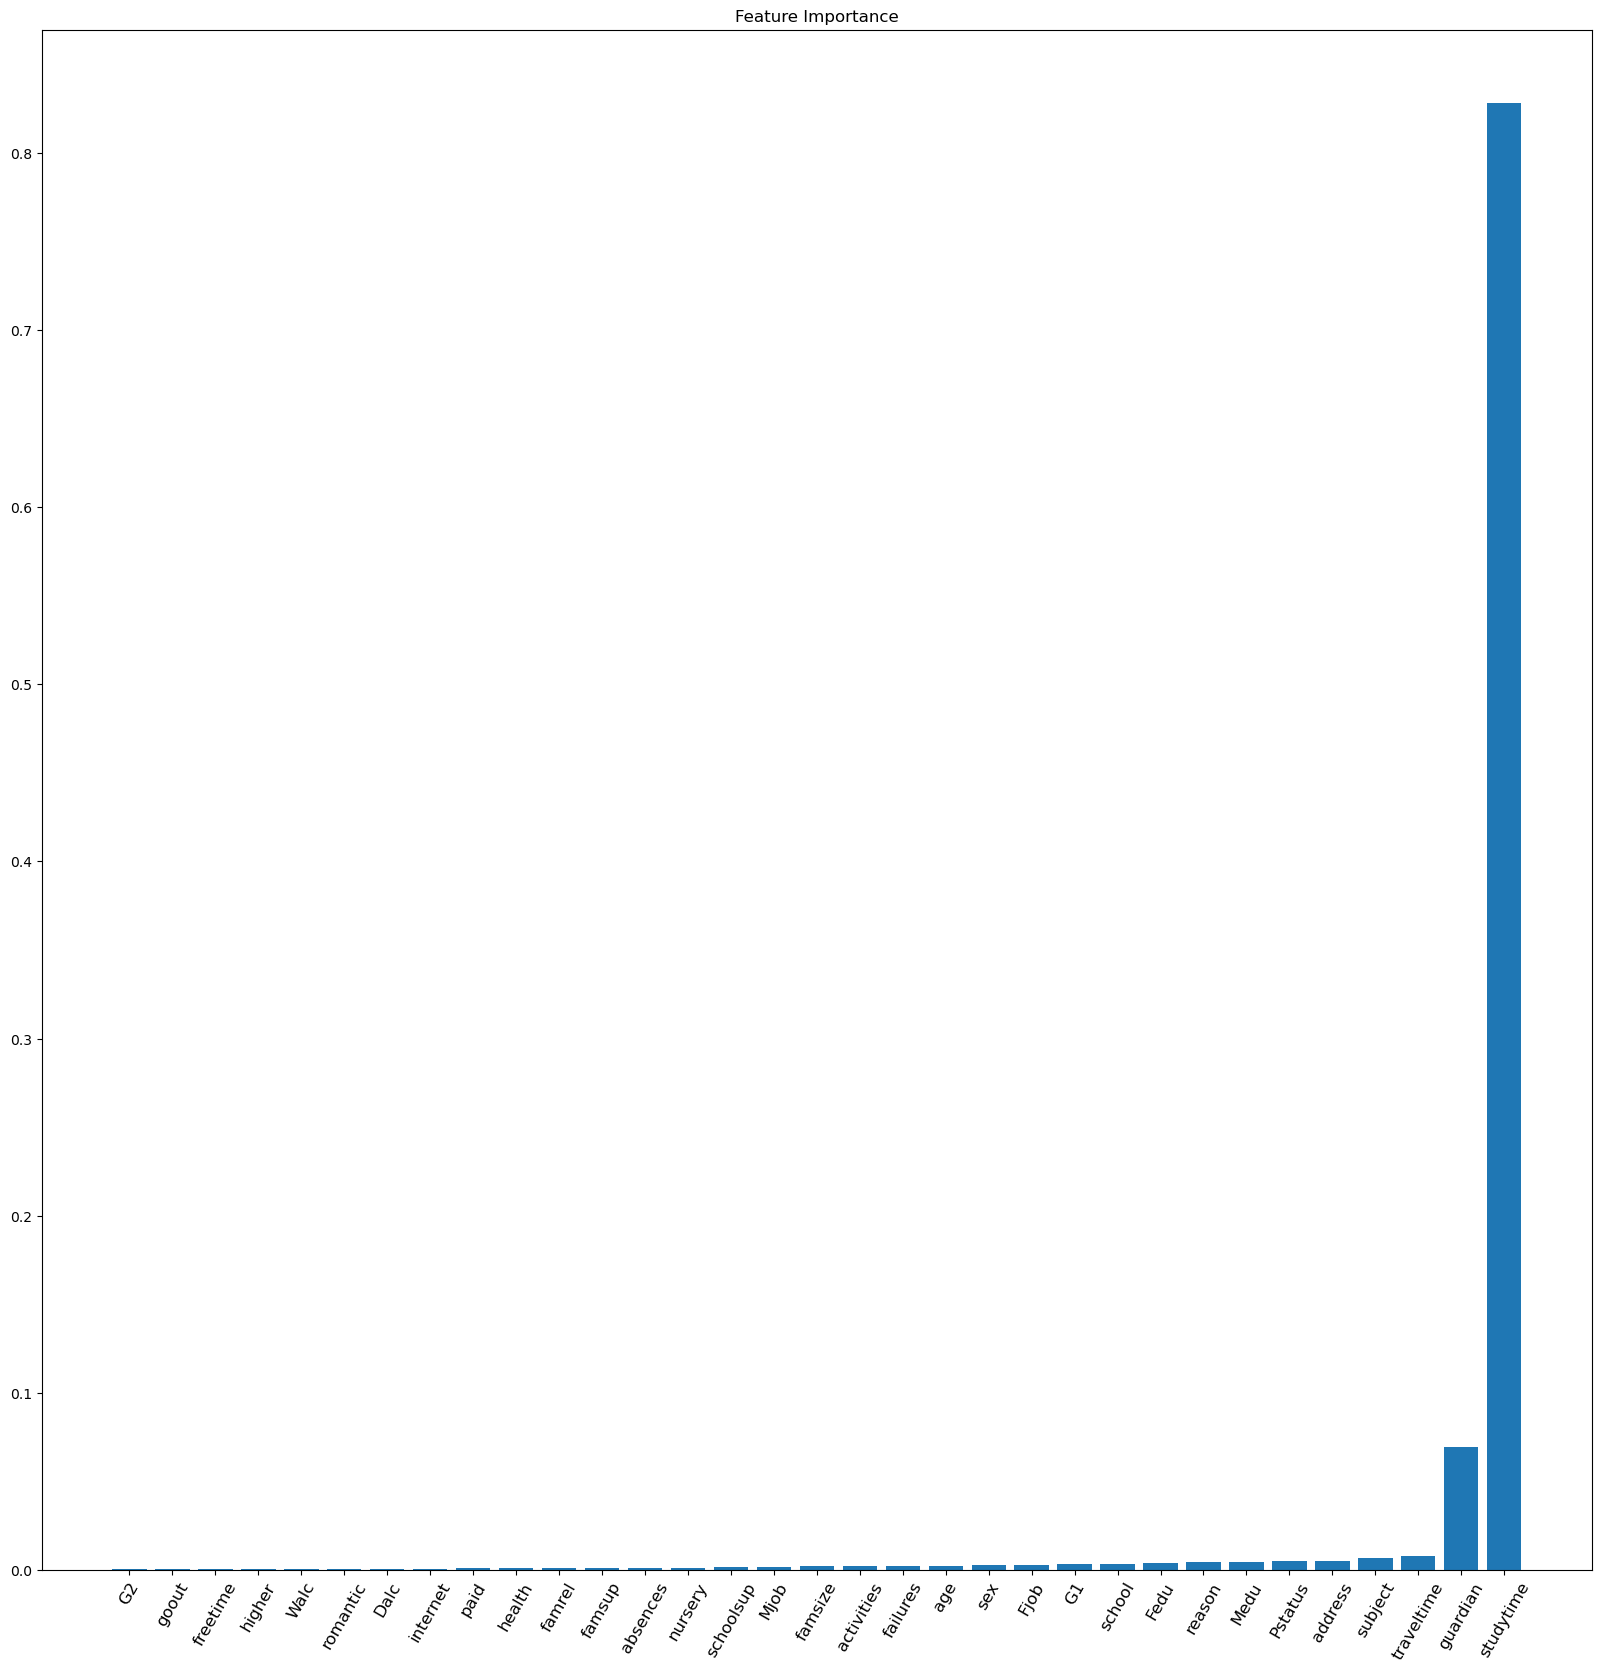

In [143]:
plt.figure(figsize=(20,20))

plt.bar(range(len(feat_importances)), list(feat_importances.values()), align='center')
plt.xticks(range(len(feat_importances)), list(feat_importances.keys()),  rotation=60, fontsize = 12)

plt.title("Feature Importance")
plt.show()

Model is giving the "studytime" to be the most weighted feature in the model.